In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
y = dataset['Exited']

In [6]:
x = dataset[['CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [7]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
geo = dataset['Geography']
geo = pd.get_dummies(geo, drop_first=True)
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
gender = dataset['Gender']
gender = pd.get_dummies(gender, drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
X = pd.concat([x, gender, geo], axis=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [13]:
X.isnull()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [14]:
import seaborn as sns
sns.set()

<AxesSubplot:>

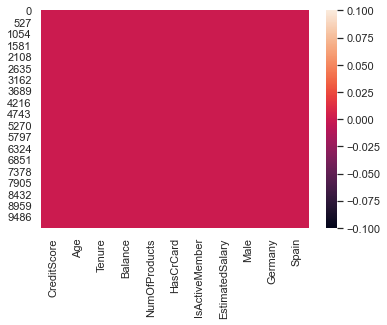

In [15]:
sns.heatmap(X.isnull())

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.30, random_state=42)

In [18]:
from keras.models import Sequential

In [19]:
age = X['Age']

In [20]:
age.shape

(10000,)

In [21]:
model = Sequential()

In [22]:
from keras.layers import Dense

In [23]:
model.add(Dense(units=6, input_shape=(11,), activation='relu'))

In [24]:
model.add(Dense(units=6, activation='relu'))

In [25]:
model.add(Dense(units=8, activation='relu'))

In [26]:
model.add(Dense(units=1, activation='sigmoid'))

In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.optimizers import Adam

In [29]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy')

In [30]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 0s 1ms/step - loss: 6041.2749
Epoch 2/50
219/219 [==============================] - 0s 973us/step - loss: 5752.6919
Epoch 3/50
219/219 [==============================] - 0s 960us/step - loss: 5481.1064
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 5244.6597
Epoch 5/50
219/219 [==============================] - 0s 987us/step - loss: 5020.9595
Epoch 6/50
219/219 [==============================] - 0s 987us/step - loss: 4804.8149
Epoch 7/50
219/219 [==============================] - 0s 951us/step - loss: 4596.3359
Epoch 8/50
219/219 [==============================] - 0s 960us/step - loss: 4395.4668
Epoch 9/50
219/219 [==============================] - 0s 1ms/step - loss: 4201.8589
Epoch 10/50
219/219 [==============================] - 0s 995us/step - loss: 4015.2297
Epoch 11/50
219/219 [==============================] - 0s 964us/step - loss: 3834.9951
Epoch 12/50
219/219 [==============================] - 0s 

In [31]:
model.history.history

{'loss': [6041.27490234375,
  5752.69189453125,
  5481.1064453125,
  5244.65966796875,
  5020.95947265625,
  4804.81494140625,
  4596.3359375,
  4395.466796875,
  4201.85888671875,
  4015.229736328125,
  3834.9951171875,
  3660.27880859375,
  3490.7587890625,
  3326.68408203125,
  3167.75341796875,
  3013.50390625,
  2863.397216796875,
  2720.448486328125,
  2584.826904296875,
  2454.343505859375,
  2328.7041015625,
  2207.63330078125,
  2092.196044921875,
  1982.6685791015625,
  1877.3692626953125,
  1776.6168212890625,
  1679.934326171875,
  1587.0284423828125,
  1497.9410400390625,
  1412.949951171875,
  1331.5684814453125,
  1253.35498046875,
  1178.30322265625,
  1106.483154296875,
  1037.6729736328125,
  971.3566284179688,
  907.7618408203125,
  846.9246215820312,
  788.54638671875,
  732.6981201171875,
  679.2603759765625,
  628.1337890625,
  579.7889404296875,
  534.4683227539062,
  491.2999267578125,
  450.72625732421875,
  412.8716735839844,
  377.1083679199219,
  343.7829895

In [32]:
df_loss = pd.DataFrame(model.history.history)

In [33]:
df_loss

,loss
0,6041.274902
1,5752.691895
2,5481.106445
3,5244.659668
4,5020.959473
5,4804.814941
6,4596.335938
7,4395.466797
8,4201.858887
9,4015.229736


<AxesSubplot:>

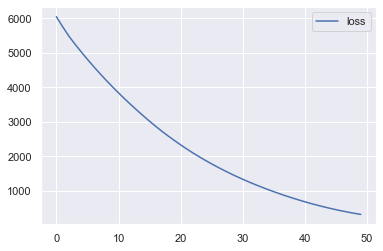

In [34]:
df_loss.plot()

In [40]:
y_pred = model.predict(X_test)

In [44]:
len(y_pred)

3000

In [43]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Exited, Length: 3000, dtype: int64